# Simulating ordinary differential equation (ODE) models in Python

As with maximum likelihood parameter estimation there is a general recipe for simulating models in `Python`.

1. import packages we might need

2. write a custom function in the format required by the `odeint()` function from the `scipy.integrate` package

2. define parameters, initial values for state variables, and time steps for storing the model simuation

3. run the simulation using the `odeint()` function from the `scipy.integrate` package

The code required to accomplish these tasks for density-dependent growth are below.

&nbsp;

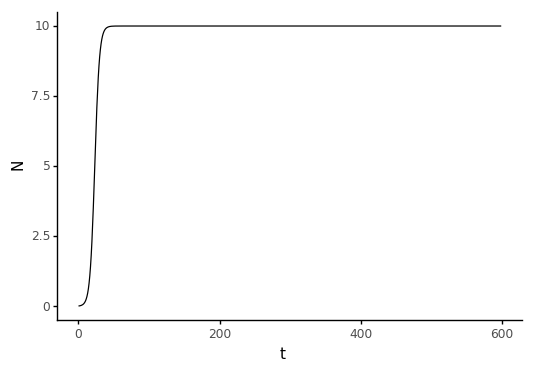

<ggplot: (285470065)>

In [3]:
### Load the necessary packages
import pandas
import scipy
import scipy.integrate as spint
from plotnine import *

### Custom function that defines the model differential equations
# the odeint function we will use for simulating the model requires the function be 
# defined with the arguments for state variable list, time, and parameters be provided 
# in that order. Parameters must be defined individually because they are passed as 
# a Python tuple when calling odeint
# odeint also requires that the dy/dt's be returned as a list
def ddSim(y,t0,r,K):
    # "unpack" lists containing state variables (y)
    N=y[0]

    # calculate change in state variables with time, give parameter values
    # and current value of state variables
    dNdt=r*(1-N/K)*N
    
    # return list containing change in state variables with time
    return [dNdt]

### Define parameters, initial values for state variables, and time steps
params=(0.3,10)
N0=[0.01]
times=range(0,600)

### Simulate the model using odeint
modelSim=spint.odeint(func=ddSim,y0=N0,t=times,args=params)

### put model output in a dataframe for plotting purposes
modelOutput=pandas.DataFrame({"t":times,"N":modelSim[:,0]})

### plot simulation output
ggplot(modelOutput,aes(x="t",y="N"))+geom_line()+theme_classic()

This general recipe applies to any model based on ordinary differential equations (ODEs). For a model with multiple state variables and therefore multiple differential equations, the vector `y` will be longer than 1 element and the return function must return a vector of dydt's that is converted to a list. For example, a model that has a prey species that grows according to density-dependent growth and a predator of that prey would be coded as follows:

In [4]:
# function for simulating predator-prey dynamics
def predPreySim(y,t0,r,K,consume,predDeath):
    prey=y[0]
    pred=y[1]
    
    dPrey_dt=r*(1-prey/K)*prey-consume*prey*pred
    dPred_dt=consume*prey*pred-predDeath*pred
    
    return [dPrey_dt,dPred_dt]

&nbsp;

&nbsp;

**Challenge**

1. Code the model presented by Gatenby and Vincent. Generate three separate plots showing time series of normal and tumor cells for the three cases presented in Figure 2 of the paper.

&nbsp;

2. The model used in the Gatenby and Vincent paper is a classic model of competition between two species developed by Lotka & Volterra. This model is often written using only competition coefficients ($\alpha$'s), rather than using any carrying capacities. If we wanted to use the classic Lotka-Volterra competition model for two species, how many state variables would we have? How many differential equations would we have? Can you write those equations without using parameters for carrying capacity?

&nbsp;

&nbsp; &nbsp; &nbsp; &nbsp; The criteria for coexistence of two species in the Lotka-Volterra competition model is:

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  $\alpha_{12} < \alpha_{11}$ and $\alpha_{21} < \alpha_{22}$

&nbsp; &nbsp; &nbsp; &nbsp; Run three or more model simulations that demonstrate the validity of these criteria for coexistence.